In [13]:
import aerosandbox as asb
import aerosandbox.numpy as np

In [14]:
wing_airfoil = asb.Airfoil("sd7037")
tail_airfoil = asb.Airfoil("naca0010")

def get_wing(*sections, **kwargs):
    wing_xsecs = []
    for section in sections:
        wing_xsecs.append(
            asb.WingXSec(
                xyz_le=section["xyz_le"],
                chord=section["chord"],
                twist=section["twist"],
                airfoil=section["airfoil"]
            )
        )
    
    wing = asb.Wing(
        name=kwargs.get("name", "Custom Wing"),
        symmetric=kwargs.get("symmetric", True),
        xsecs=wing_xsecs
    )
    
    return wing

In [25]:
wingg = get_wing(
    {
        "xyz_le": [0, 0, 0],
        "chord": 0.4,
        "twist": 0,
        "airfoil": wing_airfoil
    },
    {
        "xyz_le": [0.5, 2, 0],
        "chord": 0.1,
        "twist": 0,
        "airfoil": wing_airfoil
    },
    name="Pedro"
)

In [26]:
airplane = asb.Airplane(
    name="Peter's Glider",
    xyz_ref=[0, 0, 0],  # CG location
    wings=[wingg],
)

In [27]:
vlm = asb.VortexLatticeMethod(
    airplane=airplane,
    op_point=asb.OperatingPoint(
        velocity=25,  # m/s
        alpha=5,  # degree
    )
)

In [28]:
aero = vlm.run()  # Returns a dictionary
for k, v in aero.items():
    print(f"{k.rjust(4)} : {v}")

 F_g : [-2.08934602e+01  1.02427967e-15  2.88444165e+02]
 F_b : (20.89346017636563, 1.0242796736649462e-15, -288.4441645120922)
 F_w : (-4.325611146792628, 1.0242796736649462e-15, -289.1675324226892)
 M_g : [-4.21936791e-14 -8.89597920e+01 -7.83444490e-16]
 M_b : (4.219367910618388e-14, -88.95979201613441, 7.834444898380255e-16)
 M_w : (4.210140110497824e-14, -88.95979201613441, -2.8969581947299685e-15)
   L : 289.1675324226892
   D : 4.325611146792628
   Y : 1.0242796736649462e-15
 l_b : 4.219367910618388e-14
 m_b : -88.95979201613441
 n_b : 7.834444898380255e-16
  CL : 0.7553769317351439
  CD : 0.011299563434968728
  CY : 2.675671195342651e-18
  Cl : 2.7555074730223773e-17
  Cm : -0.8299461533836671
  Cn : 5.116375704081451e-19


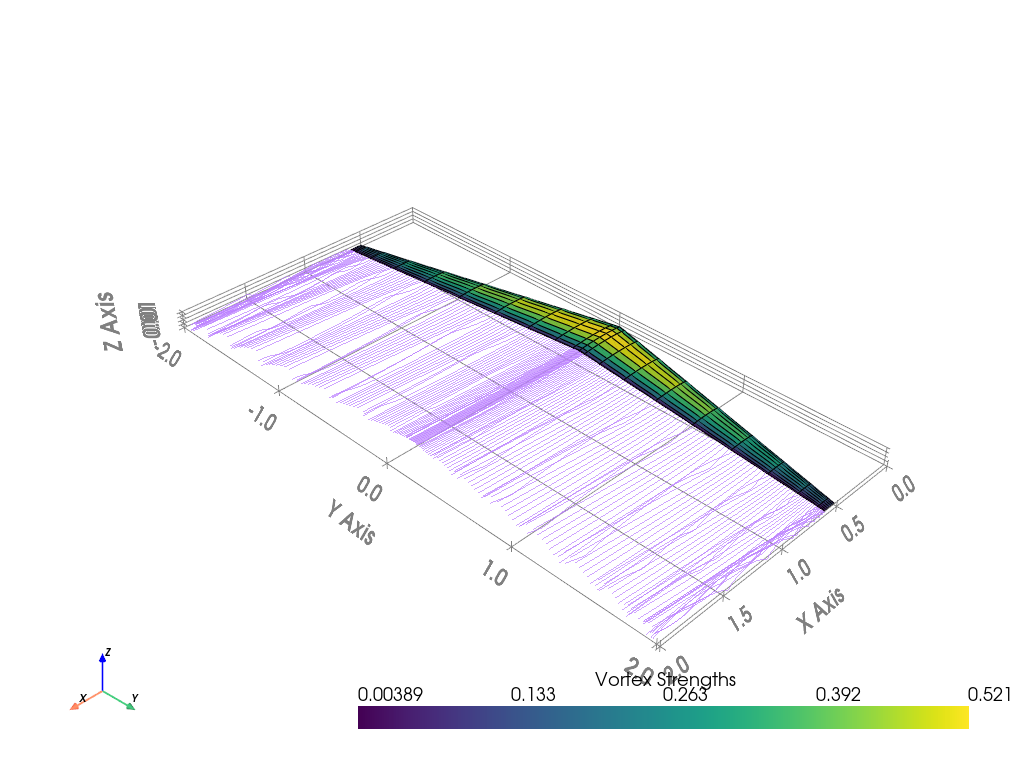

In [29]:
vlm.draw(show_kwargs=dict(jupyter_backend="static"))
